In [1]:
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [16]:
NUM_ASSETS = 20

# Function to read asset data from a text file
def read_asset_data(file_path):
    with open(file_path, "r") as file:
        lines = file.readlines()

        asset_name = lines[0].strip()
        num_points = int(lines[1].strip())
        data = [float(line.split()[1]) for line in lines[2 : num_points + 2]]

    return asset_name, data

# Read all asset data
asset_data = {}
for file in pathlib.Path("data").glob("*Part2.txt"):
    asset_name, data = read_asset_data(file)
    asset_data[asset_name] = data
asset_data = pd.DataFrame(asset_data)

assert len(asset_data.columns) == NUM_ASSETS

In [10]:
asset_data.cov()

,ABCDE,Apples,BetterTechnology,BetterTomorrow,CPU-XYZ,Electronics123,EnviroLike,Fuel4,Lasers,MarsProject,Moneymakers,PearPear,Photons,PositiveCorrelation,RoboticsX,SafeAndCare,SpaceNow,SuperFuture,WaterForce,WorldNow
ABCDE,0.473603,-0.711997,0.155723,-0.191133,0.159171,0.275302,0.189002,-0.193473,-0.431047,-0.161818,0.033139,0.098166,0.162644,-0.301079,0.130412,0.254332,0.123817,0.268904,0.360058,0.560093
Apples,-0.711997,2.285147,0.294712,-0.075426,-1.176433,0.040098,-0.058437,0.568648,0.855528,-0.005924,-0.436617,0.730034,-0.452965,1.333249,-0.340704,-0.036381,-0.060050,0.653119,-0.536688,-1.294544
BetterTechnology,0.155723,0.294712,1.075292,-0.608165,-0.174119,1.187266,0.706255,0.203383,-0.084748,-0.143632,-0.080618,0.268382,-0.457670,0.262605,0.074950,0.965049,0.127214,0.356255,0.294366,0.056603
BetterTomorrow,-0.191133,-0.075426,-0.608165,0.733636,-0.244420,-1.042672,-0.632599,-0.006948,0.296235,0.225560,0.245871,0.188992,-0.019903,0.161200,-0.275722,-0.897824,-0.104175,0.184776,-0.317075,-0.450881
CPU-XYZ,0.159171,-1.176433,-0.174119,-0.244420,1.410248,0.303853,0.267701,-0.316082,-0.439845,0.029447,0.022111,-1.234119,0.299964,-1.015128,0.301799,0.390812,-0.068477,-1.568813,0.261140,0.870330
Electronics123,0.275302,0.040098,1.187266,-1.042672,0.303853,1.840665,1.021452,0.057790,-0.411254,-0.220403,-0.163841,-0.247459,-0.246100,-0.226939,0.344201,1.487664,0.188403,-0.261042,0.426054,0.710187
EnviroLike,0.189002,-0.058437,0.706255,-0.632599,0.267701,1.021452,0.687176,0.110644,-0.232349,-0.186581,-0.161067,-0.180810,-0.179876,-0.082666,0.130441,0.846800,0.093904,-0.161314,0.291795,0.295791
Fuel4,-0.193473,0.568648,0.203383,-0.006948,-0.316082,0.057790,0.110644,0.499134,0.311331,-0.064760,-0.135295,0.137122,-0.401588,0.512922,-0.395713,-0.076914,-0.044161,0.235778,-0.264586,-0.610220
Lasers,-0.431047,0.855528,-0.084748,0.296235,-0.439845,-0.411254,-0.232349,0.311331,0.596194,0.130067,-0.073355,0.243156,-0.351474,0.686062,-0.396987,-0.398272,-0.039395,0.137537,-0.391107,-0.882439
MarsProject,-0.161818,-0.005924,-0.143632,0.225560,0.029447,-0.220403,-0.186581,-0.064760,0.130067,0.227513,0.212712,-0.113731,-0.046481,-0.116083,0.032930,-0.232010,0.010186,-0.192515,-0.108094,-0.096609


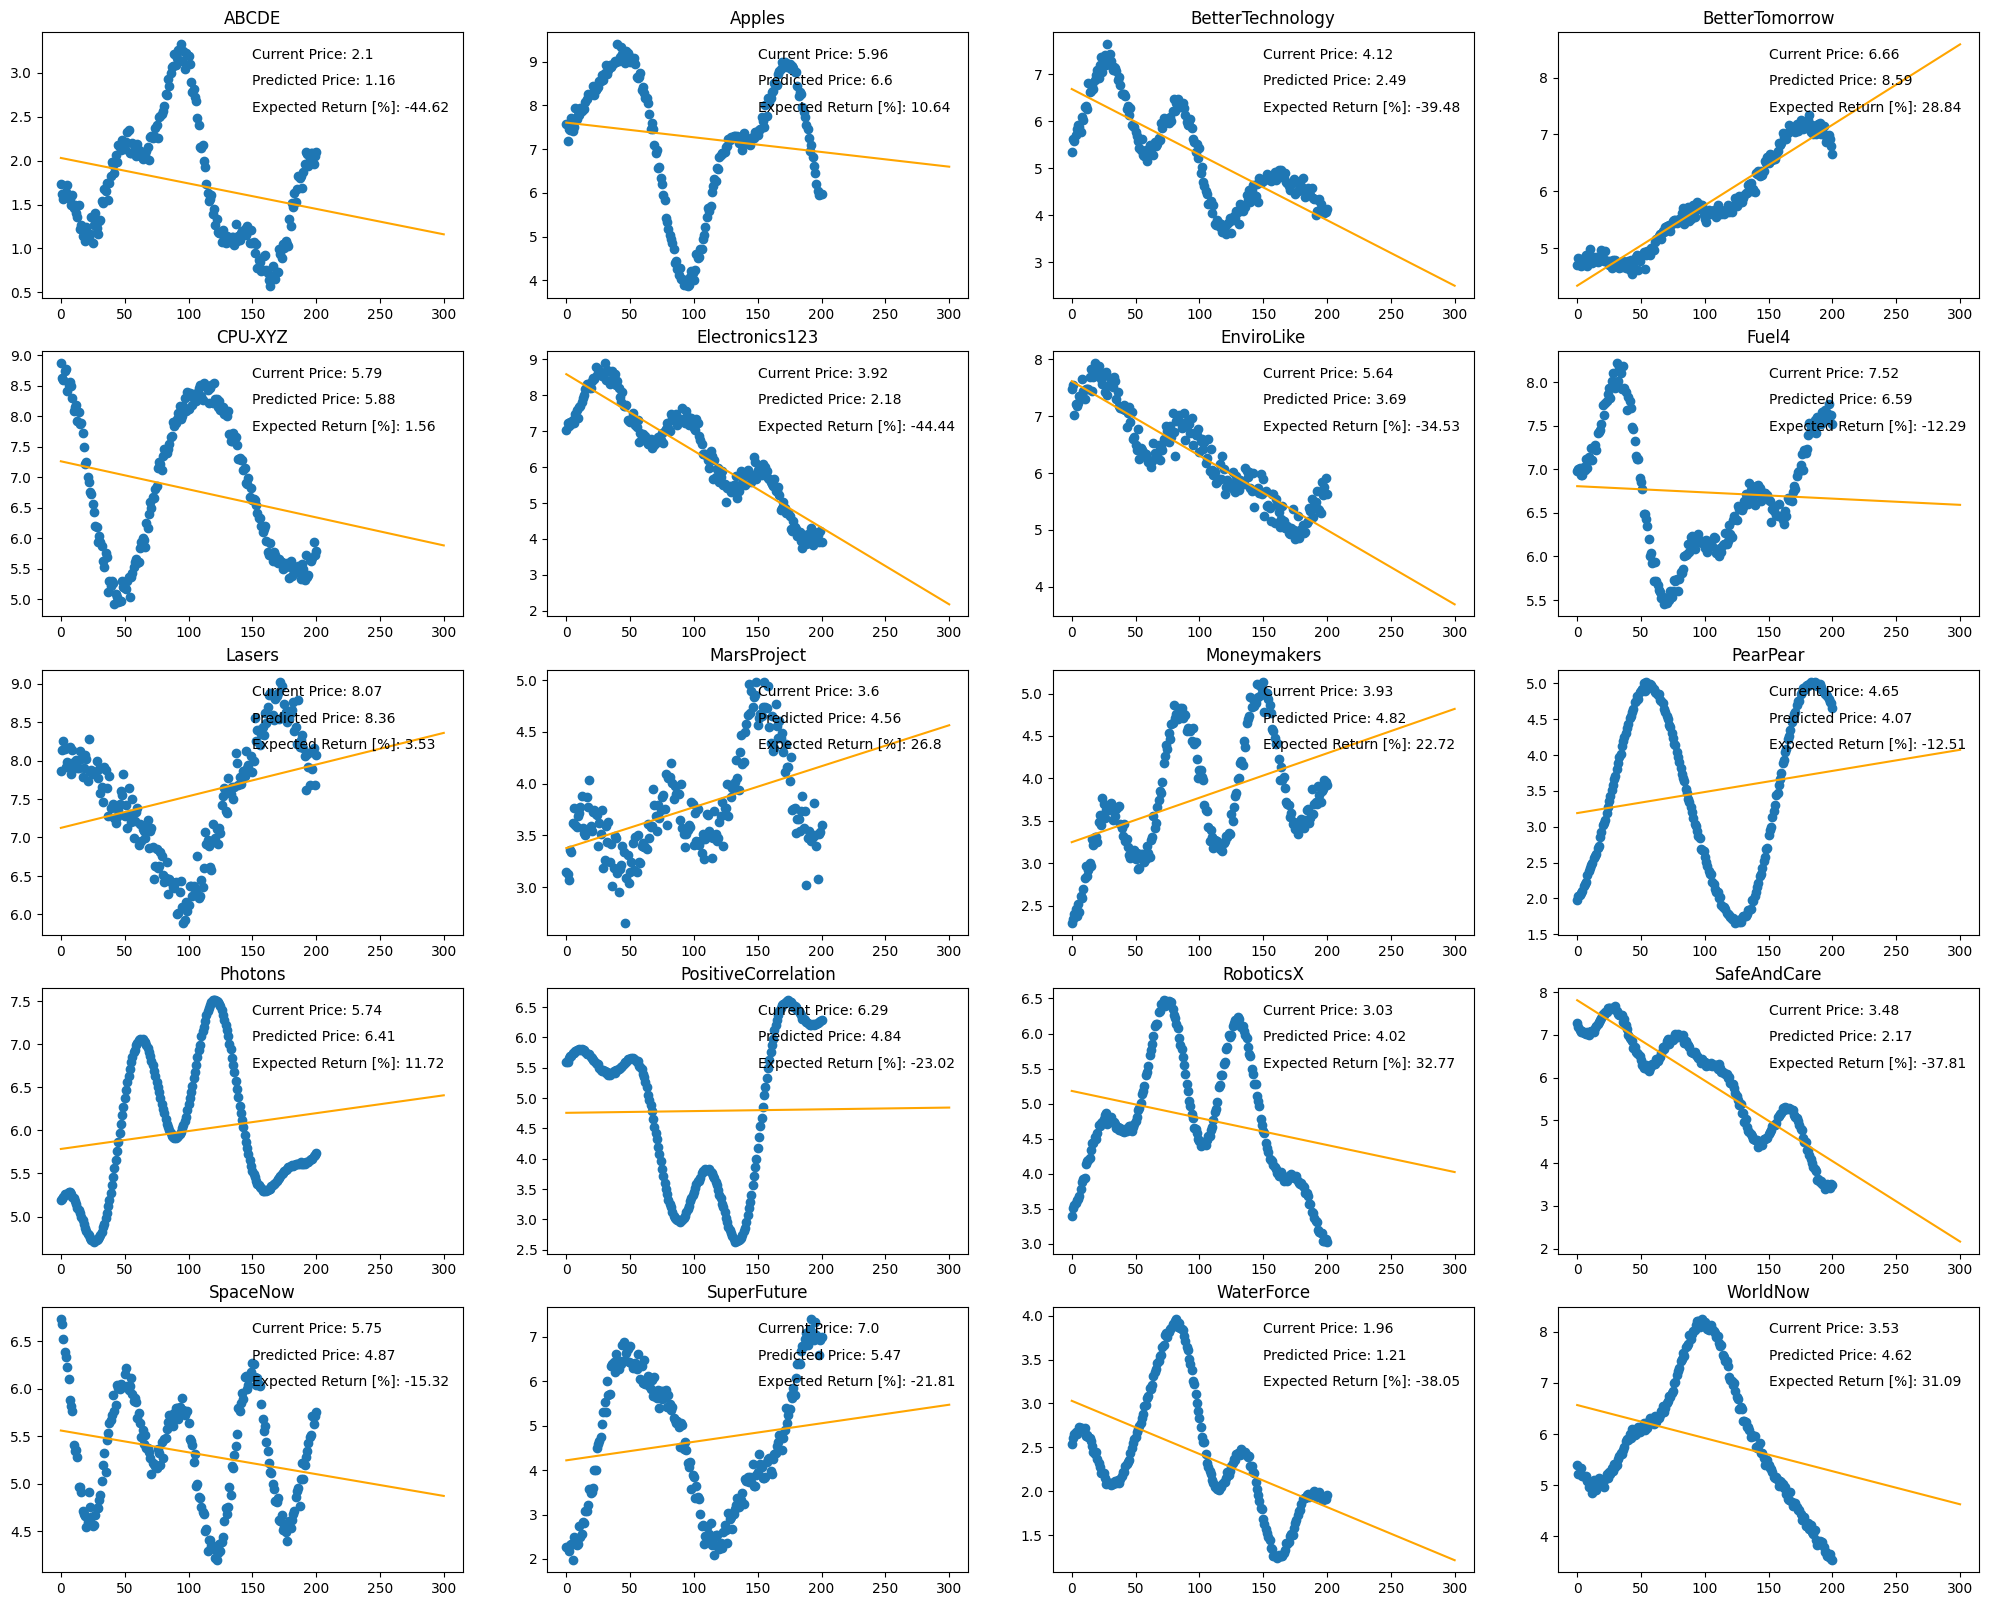

In [4]:
fig, axs = plt.subplots(5, 4, figsize=(25, 20))
predicted_returns = np.zeros(NUM_ASSETS)
for i, asset in enumerate(sorted(asset_data.columns)):
    ax = axs.flat[i]
    ax.set_title(asset)

    data = asset_data[asset].values
    model = LinearRegression()
    model.fit(np.arange(0, 201).reshape(-1, 1), data)

    predictions = model.predict(np.arange(0, 301).reshape(-1, 1))

    ax.scatter(np.arange(0, 201), asset_data[asset])
    ax.plot(np.arange(0, 301), predictions, color="orange")

    cur = data[200]
    pred = predictions[300]
    ret = (pred - cur) / cur * 100
    predicted_returns[i] = ret
    ax.text(0.5, 0.9, f"Current Price: {np.round(cur, 2)}", transform=ax.transAxes)
    ax.text(0.5, 0.8, f"Predicted Price: {np.round(pred, 2)}", transform=ax.transAxes)
    ax.text(
        0.5, 0.7, f"Expected Return [%]: {np.round(ret, 2)}", transform=ax.transAxes
    )

In [110]:
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [183]:
HORIZON = 25

class VariableLengthTSDataset(Dataset):
    def __init__(self, data, horizon=HORIZON, min_input_len=50, max_input_len=180):
        """
        data: shape (num_series, total_length)
        horizon: how many steps to forecast
        min_input_len, max_input_len: range of random subsequence lengths
        """
        self.data = data
        self.horizon = horizon
        self.min_input_len = min_input_len
        self.max_input_len = max_input_len
        
        # We create a list of (company_idx, start, end) to allow random draws
        # from different sub-sequences. Another approach is to store them offline.
        self.indices = []
        total_length, num_series = data.shape
        for company_idx in range(num_series):
            for start in range(0, total_length - horizon - self.min_input_len):
                max_end = min(start + max_input_len, total_length - horizon)
                for end in range(start + min_input_len, max_end + 1):
                    self.indices.append((company_idx, start, end))
        
    def __len__(self):
        return len(self.indices)
    
    def __getitem__(self, idx):
        company_idx, start, end = self.indices[idx]
        
        # The last 20 points of [start:end+HORIZON] will serve as the target
        # The input sequence is [start:end], and the output is [end : end+horizon]
        x_seq = self.data[start:end, company_idx]
        y_seq = self.data[end : end + self.horizon, company_idx]
        
        # Convert to float tensors
        x_seq = torch.tensor(x_seq, dtype=torch.float)
        y_seq = torch.tensor(y_seq, dtype=torch.float)
        
        return x_seq, y_seq
    
def collate_fn(batch):
    batch.sort(key=lambda x: len(x[0]), reverse=True)
    x_seqs = [item[0] for item in batch]
    y_seqs = [item[1] for item in batch]
    
    lengths = [len(seq) for seq in x_seqs]  # original lengths
    padded_x = nn.utils.rnn.pad_sequence(x_seqs, batch_first=True, padding_value=0.0)
    y_seqs = torch.stack(y_seqs, dim=0)
    
    return padded_x, y_seqs, torch.tensor(lengths, dtype=torch.long)

In [184]:
class LSTMModel(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=1, output_size=20):
        """
        input_size: each timestep is 1D (the time series value)
        hidden_size: dimension of LSTM's hidden state
        num_layers: number of stacked LSTM layers
        output_size: how many future points to predict
        """
        super(LSTMModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        
        # LSTM
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        
        # FC layer to map the final hidden state -> 20-dim output
        self.fc = nn.Linear(hidden_size, output_size)
    
    def forward(self, x, lengths):
        """
        x: padded input of shape [batch_size, max_seq_len, 1]
        lengths: 1D tensor of actual sequence lengths for each batch sample
        """
        # Convert padded sequences into packed sequences
        # "enforce_sorted=False" because we already sorted, but it's okay to keep it flexible
        packed_input = nn.utils.rnn.pack_padded_sequence(
            x, lengths.cpu(), batch_first=True, enforce_sorted=False
        )
        
        # Pass through LSTM
        packed_output, (hn, cn) = self.lstm(packed_input)
        
        # "hn" shape -> [num_layers, batch_size, hidden_size]
        # We'll use the top layer's hidden state for each batch item
        last_hidden = hn[-1]  # shape: [batch_size, hidden_size]
        
        # Map hidden state to 20 future points
        out = self.fc(last_hidden)  # shape: [batch_size, 20]
        return out

In [202]:
dataset = VariableLengthTSDataset(asset_data.values, horizon=HORIZON, min_input_len=70, max_input_len=180)
dataloader = DataLoader(dataset, batch_size=16, shuffle=True, collate_fn=collate_fn)

In [203]:
class LSTMForecaster(nn.Module):
    def __init__(self, input_size=1, hidden_size=32, num_layers=1, horizon=20):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.horizon = horizon
        
        self.lstm = nn.LSTM(
            input_size=input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_size, horizon)
        
    def forward(self, padded_x, lengths):
        """
        padded_x: [batch, seq_len]
        lengths: the actual lengths of each sequence in the batch
        """
        padded_x = padded_x.unsqueeze(-1)  # shape: (batch, seq_len, 1)
        
        packed_input = nn.utils.rnn.pack_padded_sequence(
            padded_x, 
            lengths.cpu(),  # lengths must be on CPU or a list for pack_padded_sequence
            batch_first=True,
            enforce_sorted=True  # our collate_fn sorted them
        )
        
        _, (h_n, c_n) = self.lstm(packed_input)
        final_hidden = h_n[-1]  # shape: (batch, hidden_size)
        out = self.fc(final_hidden)  # shape: (batch, horizon)
        return out

In [205]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = LSTMForecaster(input_size=1, hidden_size=32, num_layers=1, horizon=HORIZON).to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

EPOCHS = 5  # just an example

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0
    for i, (padded_x, y, lengths) in enumerate(dataloader):
        padded_x = padded_x.to(device)
        y = y.to(device)
        lengths = lengths.to(device)
        
        optimizer.zero_grad()
        output = model(padded_x, lengths)  # shape: (batch, horizon)
        
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / len(dataloader)
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss:.4f}")

Epoch 1/5, Loss: 0.5374
Epoch 2/5, Loss: 0.0778
Epoch 3/5, Loss: 0.0461
Epoch 4/5, Loss: 0.0311
Epoch 5/5, Loss: 0.0261


In [207]:
def predict_future(model, input_sequence, device='cpu'):
    """
    input_sequence: 1D or 2D PyTorch tensor or NumPy array representing 
                    the historical data we have available, 
                    shape: (seq_len,) or (seq_len, 1)
    Returns:
        prediction: 1D PyTorch tensor of shape (HORIZON,) 
                    with the forecast for the next HORIZON steps.
    """
    model.eval()
    
    # Ensure it's a torch float tensor
    if not isinstance(input_sequence, torch.Tensor):
        input_sequence = torch.tensor(input_sequence, dtype=torch.float32)
    
    # If shape is (seq_len,), expand to (seq_len, 1) for our LSTM's input_size=1
    if input_sequence.dim() == 1:
        input_sequence = input_sequence.unsqueeze(-1)  # (seq_len, 1)
    
    # We'll put this in a "batch" of size 1:
    #  (batch, seq_len, input_size) -> here batch=1
    input_sequence = input_sequence.unsqueeze(0)  # shape (1, seq_len, 1)
    
    # The LSTMForecaster forward expects:
    #   padded_x of shape (batch, seq_len) or (batch, seq_len, 1)
    #   lengths: the actual length(s) for each sequence
    #
    # So let's remove the trailing dimension for lengths, since we only need seq_len
    seq_len = input_sequence.shape[1]
    lengths = torch.tensor([seq_len], dtype=torch.long)
    
    # Move data to device
    input_sequence = input_sequence.to(device)
    lengths = lengths.to(device)
    
    with torch.no_grad():
        # Our model expects an input of shape (batch, seq_len) if univariate,
        # and we .unsqueeze(-1) inside forward(...). 
        # But we've already expanded to (batch, seq_len, 1). 
        #
        # So, we can do EITHER:
        # (A) pass (batch, seq_len) and do the unsqueeze in forward, OR
        # (B) tweak the forward to skip the unsqueeze. 
        #
        # For simplicity, let's revert to (batch, seq_len) and rely on the
        # original forward's unsqueeze:
        input_sequence_2d = input_sequence.squeeze(-1)  # shape (1, seq_len)
        
        pred = model(input_sequence_2d, lengths)
        # pred.shape = (1, HORIZON)
    
    # Return just the 1D horizon vector
    return pred.squeeze(0)  # shape (HORIZON,)


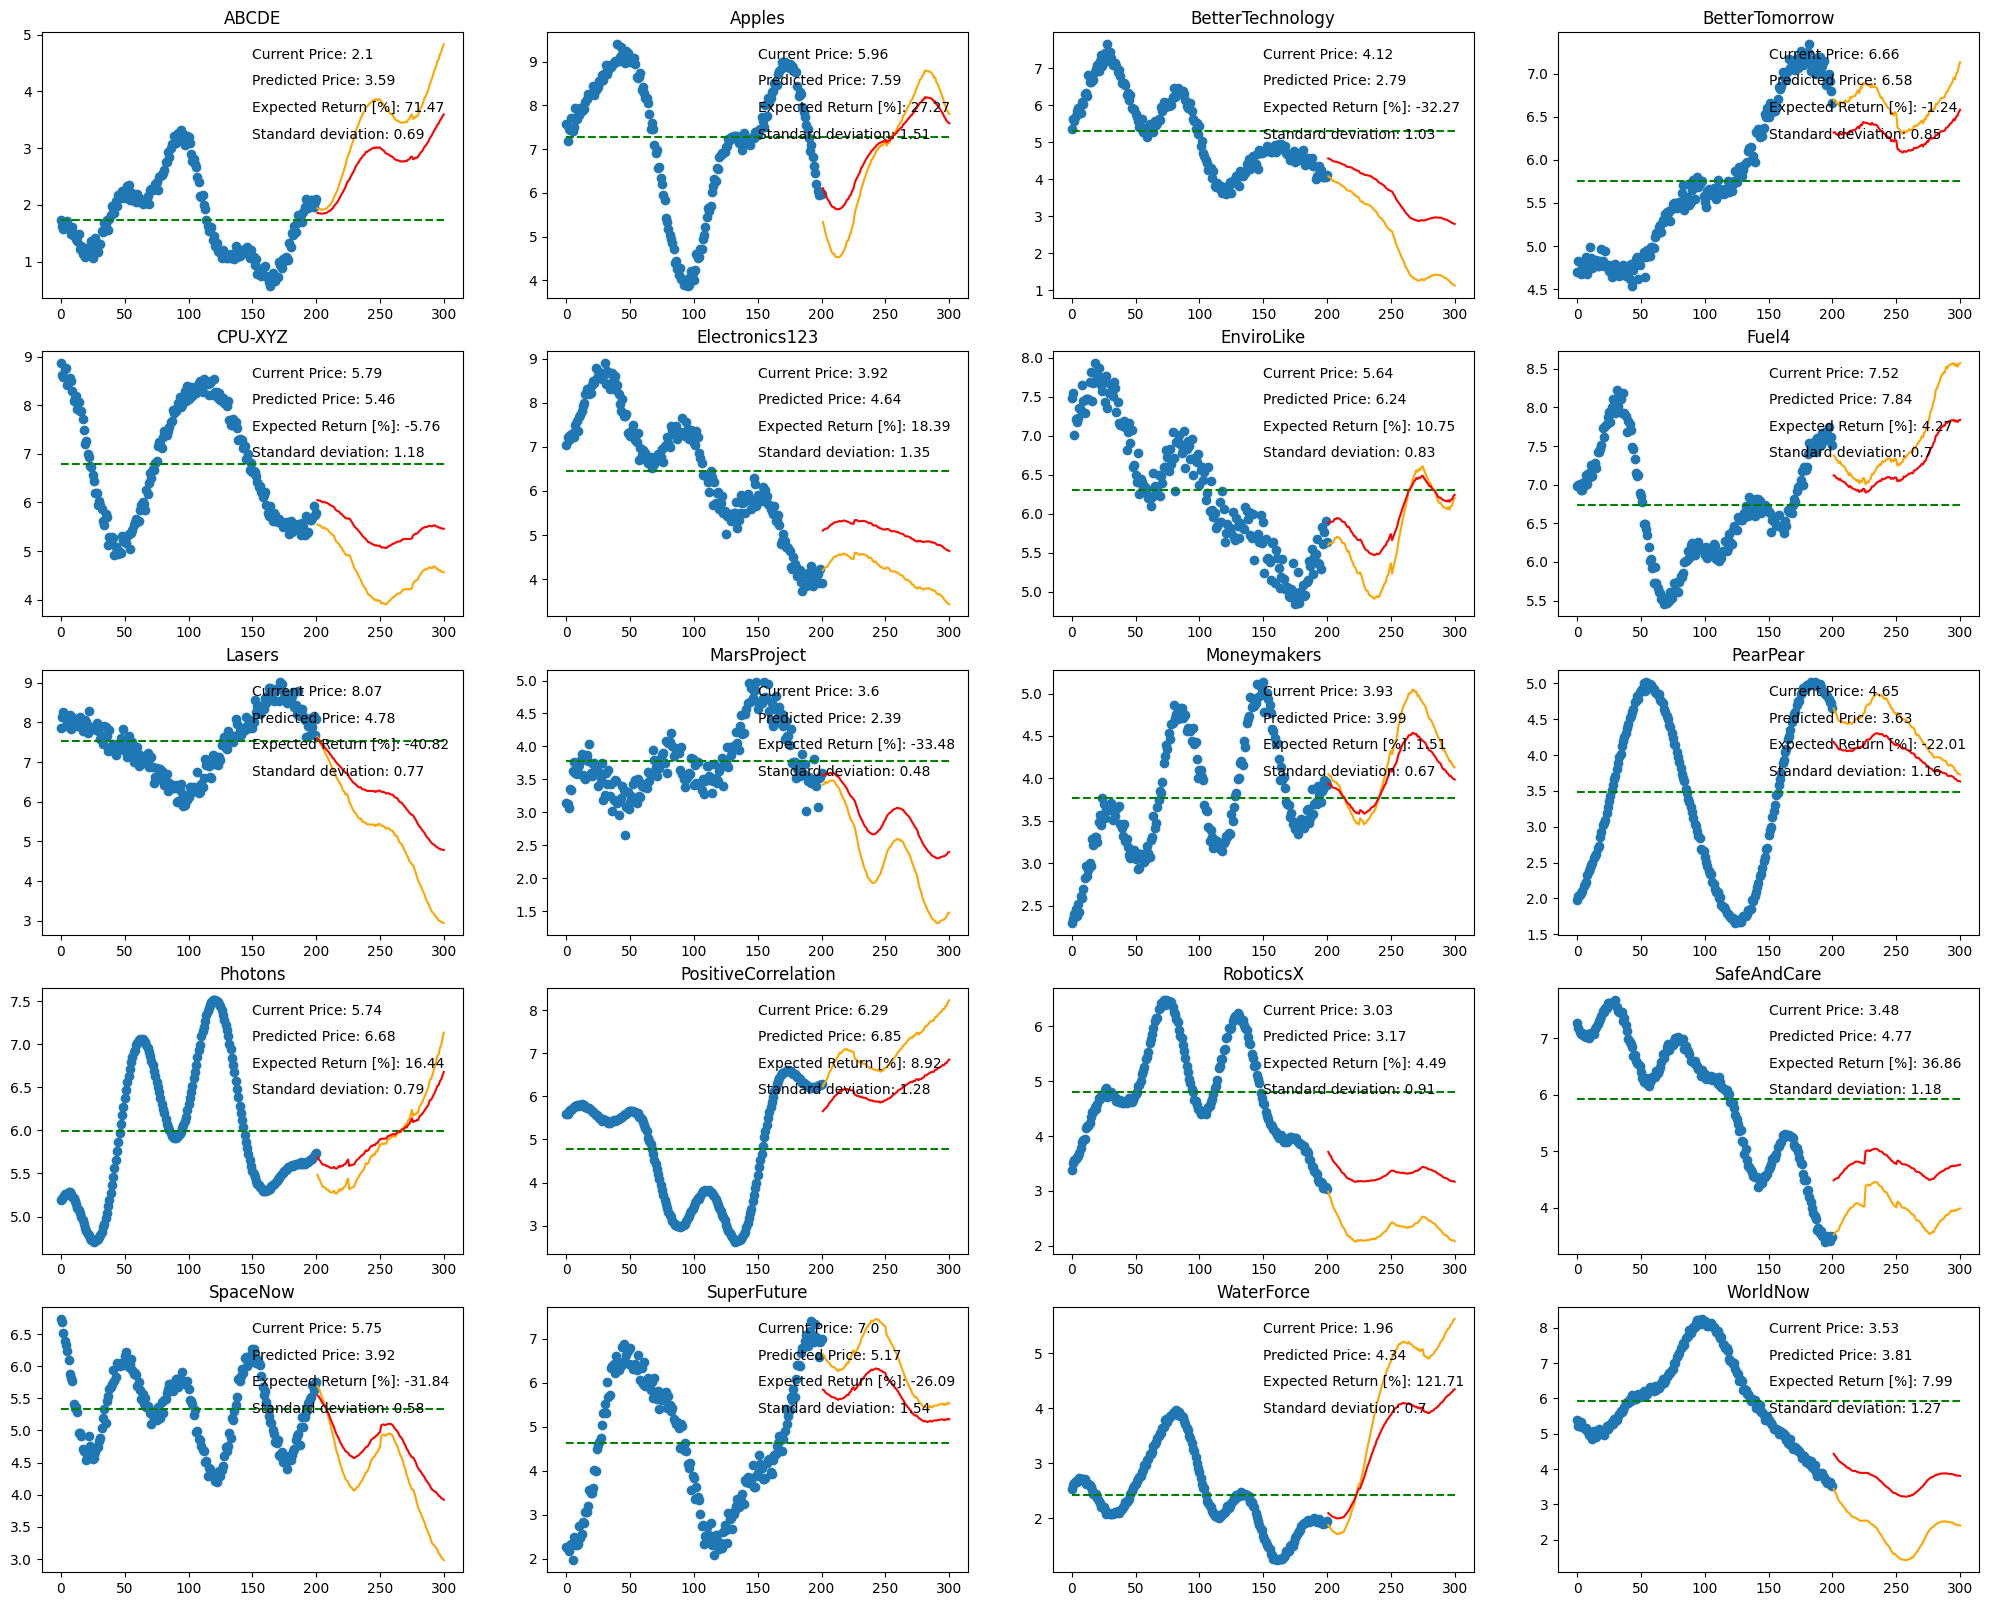

In [230]:
fig, axs = plt.subplots(5, 4, figsize=(25, 20))
predicted_returns = np.zeros(NUM_ASSETS)
for i, asset in enumerate(sorted(asset_data.columns)):
    ax = axs.flat[i]
    ax.set_title(asset)

    data = asset_data[asset].values
    mean = np.mean(data)
    std = np.std(data)
    preds = []
    for _ in range(4):
        predictions = predict_future(model, data)
        data = np.concatenate((data, predictions), axis=0)
        preds = np.concatenate((preds, predictions), axis=0)

    ax.scatter(np.arange(0, 201), asset_data[asset])
    ax.plot(np.arange(201, 301), preds, color="orange")
    ax.plot(np.arange(0, 301), [mean] * 301, color="green", linestyle="--")

    wpreds = preds * 0.6 + mean * 0.4
    ax.plot(np.arange(201, 301), wpreds, color="red")

    cur = data[200]
    pred = wpreds[-1]
    ret = (pred - cur) / cur * 100
    predicted_returns[i] = ret
    ax.text(0.5, 0.9, f"Current Price: {np.round(cur, 2)}", transform=ax.transAxes)
    ax.text(0.5, 0.8, f"Predicted Price: {np.round(pred, 2)}", transform=ax.transAxes)
    ax.text(
        0.5, 0.7, f"Expected Return [%]: {np.round(ret, 2)}", transform=ax.transAxes
    )
    ax.text(
        0.5, 0.6, f"Standard deviation: {np.round(std, 2)}", transform=ax.transAxes
    )

In [231]:
predicted_returns

array([ 71.46677457,  27.26549223, -32.26652428,  -1.24430442,
        -5.76140572,  18.39038972,  10.75029868,   4.26970396,
       -40.81589557, -33.48467357,   1.51115383, -22.00740627,
        16.44391143,   8.91544717,   4.48981592,  36.85685436,
       -31.84025959, -26.09017046, 121.71178691,   7.99343874])

In [232]:
cov_matrix = asset_data.cov().values

np.savetxt('predicted_returns.csv', np.round(predicted_returns, 5), delimiter=',')
np.savetxt('cov_matrix.csv', np.round(cov_matrix, 5), delimiter=',')

In [233]:
!./a.out

zsh:1: no such file or directory: ./a.out


In [235]:
random_profit_risk = pd.read_csv('output.csv',header=None)
random_profit = list(random_profit_risk[0])
random_risk = list(random_profit_risk[1])

In [236]:
solutions = np.identity(NUM_ASSETS)

risks= []
profits=[]
for sol in solutions:
    profit=0
    risk=0
    for i in range(NUM_ASSETS):
        profit += sol[i] * predicted_returns[i]
        for j in range(NUM_ASSETS):
            risk += sol[i] * sol[j] * cov_matrix[i][j]
    profits.append(profit)
    risks.append(risk)

/home/adam/studies/8sem/MOO/repo/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


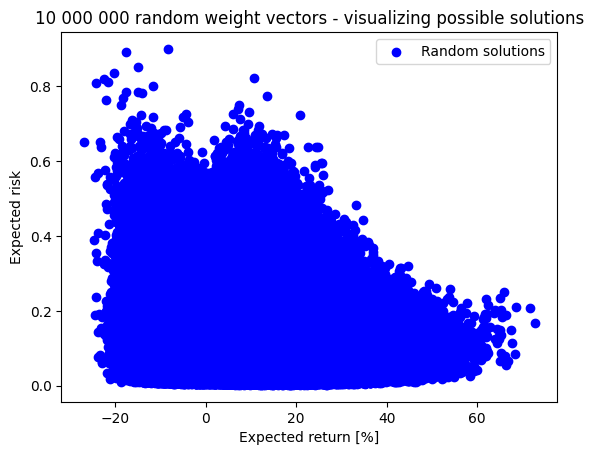

In [237]:
plt.scatter(random_profit, random_risk, color="blue", label="Random solutions")
plt.legend()
plt.title("10 000 000 random weight vectors - visualizing possible solutions")
plt.xlabel("Expected return [%]")
plt.ylabel("Expected risk")
plt.show()

In [ ]:
from cvxopt import matrix, solvers

Q = matrix(asset_data.cov().values)
c = matrix(np.zeros(NUM_ASSETS))

G = matrix(
    np.vstack([-np.identity(NUM_ASSETS), np.identity(NUM_ASSETS), -predicted_returns])
)
h = matrix(np.concat([np.zeros(NUM_ASSETS), np.ones(NUM_ASSETS), [0]]))

A = matrix(np.ones(NUM_ASSETS), (1, NUM_ASSETS))
b = matrix(1.0)

found_risk_ec = []
found_returns_ec = []
found_weights_ec = []
constraints = np.linspace(-118.93924, 2.237, 50, retstep=True)  ### Objectives

for constraint in constraints[0]:
    # print(f"Constraint: {constraint}")
    h = matrix(np.concat([np.zeros(NUM_ASSETS), np.ones(NUM_ASSETS), [constraint]]))
    sol = solvers.qp(Q, c, G, h, A, b, show_progress=False)

    optimal_x = sol["x"]
    found_weights_ec.append(optimal_x)
    total_returns = 0
    total_risk = 0
    for wi in range(NUM_ASSETS):
        # print(f'weight: {optimal_x[wi]}')
        # print(f'profit: {optimal_x[wi]*predicted_returns[wi]}')
        total_returns += optimal_x[wi] * predicted_returns[wi]
        for wj in range(NUM_ASSETS):
            total_risk += optimal_x[wi] * optimal_x[wj] * cov_matrix[wi][wj]
    # print(f"Total profit: {total_returns}")
    # print(f"Total risk: {total_risk}")
    found_risk_ec.append(total_risk)
    found_returns_ec.append(total_returns)

Number of solutions in first Pareto front: 30
Approximate Pareto front (variance, return):
Weights = [0.15605189356817403, 0.07849058753364814, 0.14407732623146977, 0.03242840422763859, 0.004082556751199446, 0.02902115473720517, 0.0198867829172166, 0.010577000524735302, 0.008173147589616785, 0.04964531691616706, 0.044538150972177004, 0.0946252547290561, 0.009150479957753853, 5.407946199933459e-05, 0.006644711041898523, 0.05939343390281201, 0.004471010391929, 0.08396601140060285, 0.1646930424315193, 2.96547131810632e-05], Variance = 0.002099, Return = 25.4435
Weights = [0.16019327980609055, 0.003268570013621184, 0.0027578565629439037, 0.0009575792215528318, 0.0013595663033969532, 0.011843546264569543, 0.0032420480067429877, 0.003990776382120284, 0.0001980162890886645, 0.0010534768387455414, 0.001445214692327609, 0.00039784074249923386, 0.0019814635247218126, 0.004403678493490657, 0.0005193155066409429, 0.003871666268468659, 0.0002831919241839526, 0.003422722355977962, 0.7948043898351133

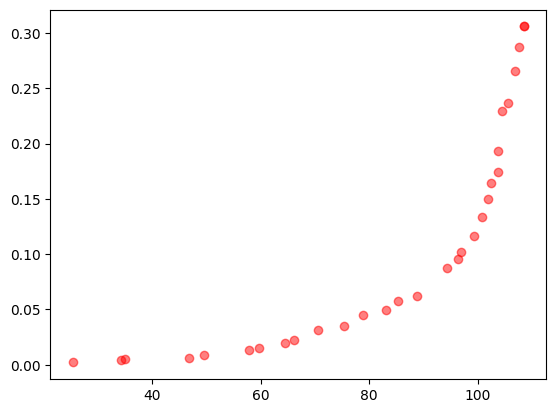

In [249]:
import random
import math

# ------------------
# 1) Problem Setup
# ------------------

# For simplicity, let’s consider a small number of assets, say 3.
# In a real-world scenario, you would replace these values
# with actual historical estimates or data-driven calculations.

# Expected returns of each asset
MU = predicted_returns

# Covariance matrix (symmetric, positive-semidefinite)
# This is just a toy example, not from real data.
SIGMA = cov_matrix

NUM_ASSETS = len(MU)

# Define weighting constraints
# (This example allows w_i >= 0 and sum(w_i) = 1)
def random_portfolio():
    """Generate a random portfolio that sums to 1."""
    weights = [random.random() for _ in range(NUM_ASSETS)]
    s = sum(weights)
    # Normalize so sum of weights = 1
    weights = [w / s for w in weights]
    return weights

def portfolio_return(weights):
    """Compute portfolio return = w^T MU."""
    return sum(w * m for w, m in zip(weights, MU))

def portfolio_variance(weights):
    """Compute portfolio variance = w^T SIGMA w."""
    var = 0.0
    for i in range(NUM_ASSETS):
        for j in range(NUM_ASSETS):
            var += weights[i] * weights[j] * SIGMA[i][j]
    return var

# Our objectives are:
# 1) Minimizing variance
# 2) Maximizing return
# We'll store them as (variance, -return) in a tuple
# so that we can *minimize* both components 
# (since for the second objective we want to maximize return,
#  we store negative return for consistent "minimization").
def evaluate(weights):
    var = portfolio_variance(weights)
    ret = portfolio_return(weights)
    return (var, -ret)


# -----------------------------
# 2) NSGA-II Core Functionality
# -----------------------------

def dominates(obj1, obj2):
    """
    Check if obj1 = (o1_1, o1_2, ...) dominates obj2 = (o2_1, o2_2, ...).
    We say obj1 dominates obj2 if:
      - obj1 is <= obj2 in all objectives (since we consider all minimization)
      - obj1 is <  obj2 in at least one objective
    """
    less_or_equal = True
    strictly_less = False
    
    for o1, o2 in zip(obj1, obj2):
        if o1 > o2:
            less_or_equal = False
            break
    
    if less_or_equal:
        # check for strictly less in at least one objective
        for o1, o2 in zip(obj1, obj2):
            if o1 < o2:
                strictly_less = True
                break
    
    return less_or_equal and strictly_less

def fast_non_dominated_sort(pop):
    """
    Perform the fast non-dominated sort on the population.
    pop is a list of tuples: (weights, (obj1, obj2), ...)
    Return a list of fronts, where each front is a list of indices of pop.
    """
    size = len(pop)
    S = [[] for _ in range(size)]  # S[i] will hold the solutions that i dominates
    n = [0]*size                   # n[i] will hold the number of solutions that dominate i
    rank = [0]*size

    # For each solution p, determine the set of solutions it dominates (S[p])
    # and the number of solutions that dominate p (n[p])
    for p in range(size):
        p_objs = pop[p][1]  # the objective tuple
        for q in range(size):
            if p == q: 
                continue
            q_objs = pop[q][1]
            if dominates(p_objs, q_objs):
                S[p].append(q)
            elif dominates(q_objs, p_objs):
                n[p] += 1

    # Identify the first front
    fronts = [[]]
    for i in range(size):
        if n[i] == 0:
            rank[i] = 0
            fronts[0].append(i)
    
    # Build subsequent fronts
    i = 0
    while i < len(fronts) and fronts[i]:
        next_front = []
        for p in fronts[i]:
            # for each q dominated by p
            for q in S[p]:
                n[q] -= 1
                if n[q] == 0:
                    rank[q] = i + 1
                    next_front.append(q)
        i += 1
        if next_front:
            fronts.append(next_front)
    return fronts

def crowding_distance_assignment(pop, front):
    """
    Assign crowding distance for each solution in a given front.
    pop is a list of (weights, objective_tuple)
    front is a list of indices into pop.
    We'll return a dictionary: index -> crowding distance.
    """
    distance = {i: 0.0 for i in front}
    if not front:
        return distance
    
    num_objectives = len(pop[front[0]][1])
    
    for m in range(num_objectives):
        # sort by each objective m
        front_sorted = sorted(front, key=lambda i: pop[i][1][m])
        # set boundary solutions to infinite distance
        distance[front_sorted[0]] = float('inf')
        distance[front_sorted[-1]] = float('inf')
        
        # actual range of this objective
        f_min = pop[front_sorted[0]][1][m]
        f_max = pop[front_sorted[-1]][1][m]
        if f_max == f_min:
            continue  # avoid divide by zero

        # for the others, sum up the distance
        for idx in range(1, len(front_sorted)-1):
            prev_i = front_sorted[idx-1]
            next_i = front_sorted[idx+1]
            dist = (pop[next_i][1][m] - pop[prev_i][1][m]) / (f_max - f_min)
            distance[front_sorted[idx]] += dist

    return distance


def make_new_population(pop, pop_size):
    """
    Given the combined population (parents + offspring),
    perform the NSGA-II selection of the next generation.
    pop is a list of (weights, objective_tuple).
    We return a new list of pop_size individuals.
    """
    # 1. Sort into fronts
    fronts = fast_non_dominated_sort(pop)
    
    new_pop = []
    for front in fronts:
        if len(new_pop) + len(front) <= pop_size:
            # Add the entire front
            new_pop.extend(front)
        else:
            # We need to fill up partially from this front
            distances = crowding_distance_assignment(pop, front)
            # sort by descending distance
            sorted_front = sorted(front, key=lambda i: distances[i], reverse=True)
            needed = pop_size - len(new_pop)
            new_pop.extend(sorted_front[:needed])
            break
    
    # Return the actual population individuals
    return [pop[i] for i in new_pop]


# -------------------
# 3) Genetic Operators
# -------------------

def tournament_selection(pop, k=2):
    """
    Perform a tournament selection of size k and return the winner.
    We pick k individuals randomly from pop.
    The winner is the one with:
      1) Lower rank, or
      2) Higher crowding distance if the same rank
    But to do that, we need the rank and crowding info, so let's do:
      - We first do a full non-dominated sort and store rank.
      - Then we do a crowding distance assignment for each front.
    """
    # Sort population into fronts
    fronts = fast_non_dominated_sort(pop)
    # Create rank array
    rank_of = {}
    for i, front in enumerate(fronts):
        for idx in front:
            rank_of[idx] = i
    
    # Create a dictionary for crowding distance per front
    distance_of = {}
    for front in fronts:
        dist = crowding_distance_assignment(pop, front)
        distance_of.update(dist)
    
    # pick k distinct random indices
    contenders = random.sample(range(len(pop)), k)
    # find the best among them
    best = contenders[0]
    for c in contenders[1:]:
        if rank_of[c] < rank_of[best]:
            best = c
        elif rank_of[c] == rank_of[best]:
            # compare crowding distances
            if distance_of[c] > distance_of[best]:
                best = c
    return pop[best]

def crossover(w1, w2, crossover_rate=0.9):
    """
    Single-point crossover for simplicity.
    With 'crossover_rate' probability, do crossover,
    otherwise return copies of the original.
    """
    if random.random() < crossover_rate:
        point = random.randint(1, NUM_ASSETS - 1)
        child1 = w1[:point] + w2[point:]
        child2 = w2[:point] + w1[point:]
        return child1, child2
    else:
        return w1[:], w2[:]

def mutate(weights, mutation_rate=0.1):
    """
    Mutate each weight with probability = mutation_rate,
    then re-normalize so sum of weights = 1.
    """
    for i in range(NUM_ASSETS):
        if random.random() < mutation_rate:
            # small random change
            weights[i] *= random.uniform(0.5, 1.5)
            if weights[i] < 0:
                weights[i] = 0
    # re-normalize
    s = sum(weights)
    if s == 0:
        # fallback if everything went to zero
        return random_portfolio()
    return [w/s for w in weights]


# ----------------------------
# 4) Putting it All Together
# ----------------------------
def nsga2_markowitz(pop_size=30, generations=50):
    # Initialize random population
    population = [random_portfolio() for _ in range(pop_size)]
    # Evaluate each
    pop_evaluated = [(ind, evaluate(ind)) for ind in population]

    for gen in range(generations):
        # 1) Create offspring
        offspring = []
        while len(offspring) < pop_size:
            # Selection
            p1 = tournament_selection(pop_evaluated)
            p2 = tournament_selection(pop_evaluated)
            
            # Crossover
            c1_weights, c2_weights = crossover(p1[0], p2[0])
            
            # Mutation
            c1_weights = mutate(c1_weights)
            c2_weights = mutate(c2_weights)
            
            # Evaluate
            c1_fit = evaluate(c1_weights)
            c2_fit = evaluate(c2_weights)
            
            offspring.append((c1_weights, c1_fit))
            offspring.append((c2_weights, c2_fit))
        
        # 2) Combine
        combined = pop_evaluated + offspring
        # 3) Select next generation
        pop_evaluated = make_new_population(combined, pop_size)
    
    # After the final generation, pop_evaluated should contain the approximate Pareto set
    return pop_evaluated


final_pop = nsga2_markowitz(pop_size=30, generations=100)

# We can extract the solutions on the first non-dominated front
# to see the approximate Pareto front
fronts = fast_non_dominated_sort(final_pop)
best_front_indices = fronts[0]
print("Number of solutions in first Pareto front:", len(best_front_indices))
print("Approximate Pareto front (variance, return):")
for idx in best_front_indices:
    w, (var, neg_ret) = final_pop[idx]
    print(f"Weights = {w}, Variance = {var:.6f}, Return = {-neg_ret:.4f}")
    plt.scatter(-neg_ret, var, color="red", alpha=0.5)


8


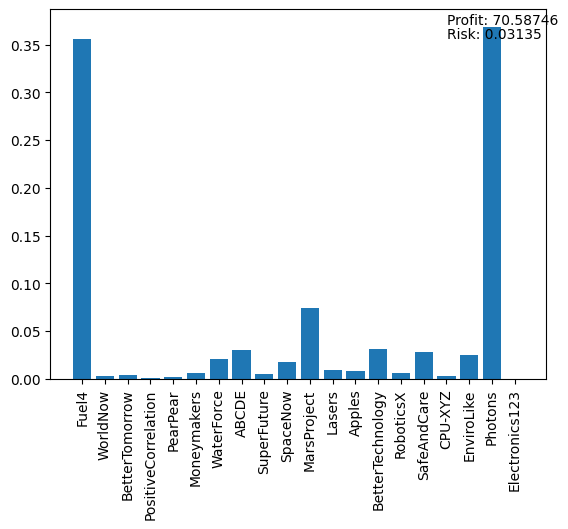

9


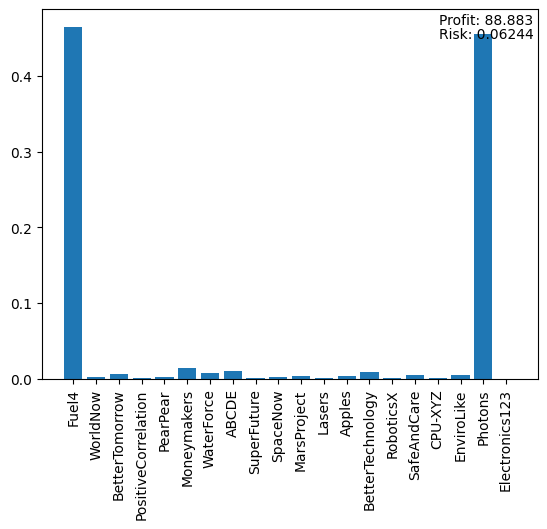

11


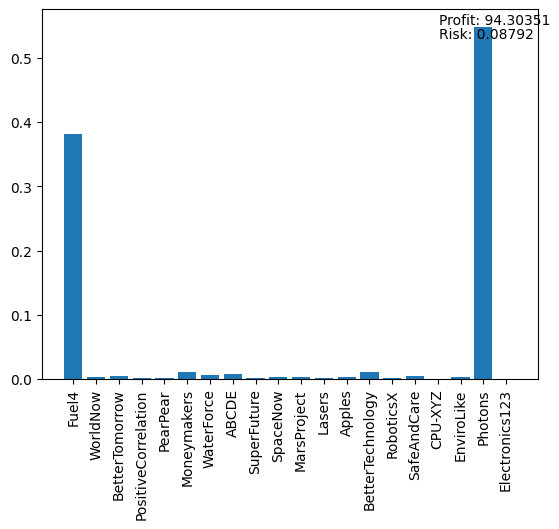

18


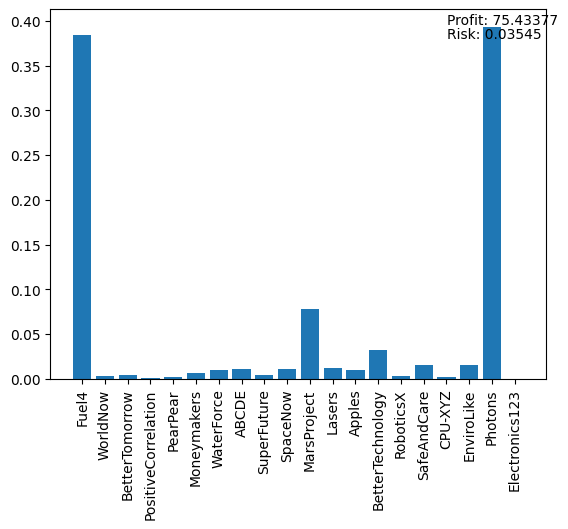

20


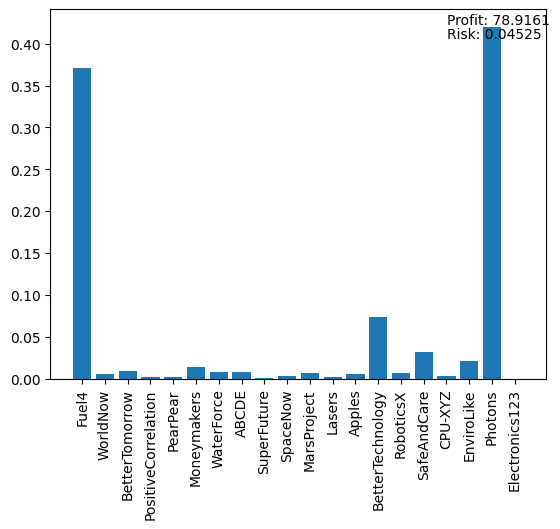

27


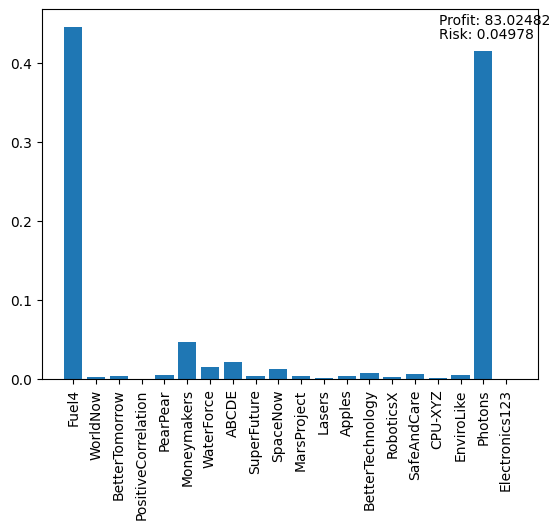

28


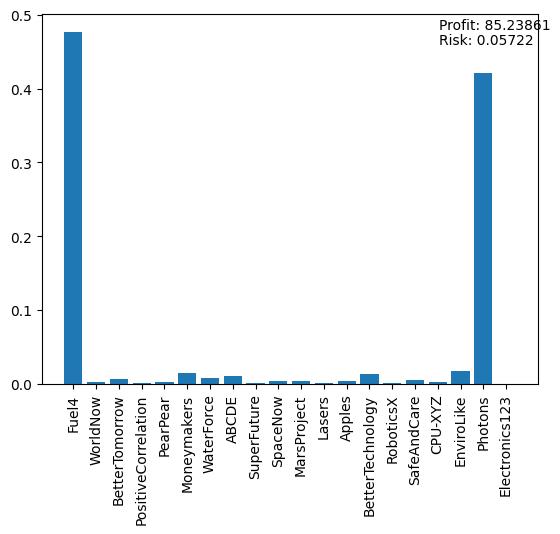

29


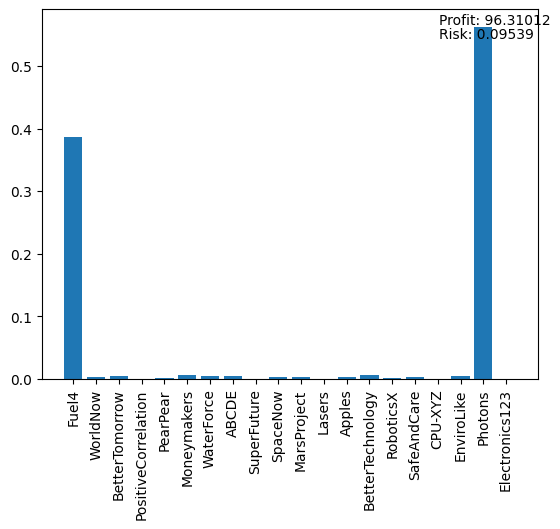

In [256]:
for idx in best_front_indices:
    w, (var, neg_ret) = final_pop[idx]
    if var > 0.03 and var < 0.1:
        print(idx)
        f, ax = plt.subplots()
        plt.bar(asset_data.columns, w)
        plt.text(.8, .99, f"Profit: {np.round(-neg_ret, 5)}", ha='left', va='top', transform=ax.transAxes)
        plt.text(.8, .95, f'Risk: {np.round(var, 5)}', ha='left', va='top', transform=ax.transAxes)
        plt.xticks(rotation=90)
        plt.show()


/tmp/ipykernel_38703/2546540487.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


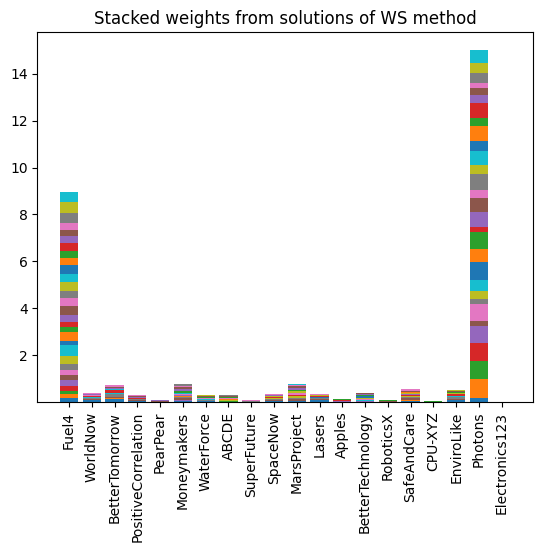

In [271]:
bottom = np.zeros(NUM_ASSETS)

for idx in best_front_indices:
    w, (var, neg_ret) = final_pop[idx]
    plt.bar(asset_data.columns, w, label=f"Profit: {np.round(-neg_ret, 2)}\nRisk: {np.round(var, 2)}", bottom=bottom)
    bottom += w

ax.legend()
plt.title("Stacked weights from solutions of WS method")
plt.xticks(rotation=90)
plt.show()

In [ ]:
w, (var, neg_ret) = final_pop[8]

In [ ]:
-neg_ret

np.float64(70.58746262667874)

In [ ]:
order = ["SuperFuture",
"Apples",
"WorldNow",
"Electronics123",
"Photons",
"SpaceNow",
"PearPear",
"PositiveCorrelation",
"BetterTechnology",
"ABCDE",
"EnviroLike",
"Moneymakers",
"Fuel4",
"MarsProject",
"CPU-XYZ",
"RoboticsX",
"Lasers",
"WaterForce",
"SafeAndCare",
"BetterTomorrow"]

In [285]:
w

[0.3562323232365268,
 0.002719594840284715,
 0.004143020824709013,
 0.0005444451343265943,
 0.0018315644587138546,
 0.006347634384972274,
 0.02074900484236238,
 0.029754394319312736,
 0.004951194028824526,
 0.017459816899186898,
 0.07430246649476666,
 0.009707342398937028,
 0.008368703788779118,
 0.0316280614249039,
 0.006264999232333764,
 0.02844150315985503,
 0.0025952699110709243,
 0.025271620282259113,
 0.36862651134379704,
 6.052899407766254e-05]

In [13]:
w = eval("""[0.3562323232365268,
 0.002719594840284715,
 0.004143020824709013,
 0.0005444451343265943,
 0.0018315644587138546,
 0.006347634384972274,
 0.02074900484236238,
 0.029754394319312736,
 0.004951194028824526,
 0.017459816899186898,
 0.07430246649476666,
 0.009707342398937028,
 0.008368703788779118,
 0.0316280614249039,
 0.006264999232333764,
 0.02844150315985503,
 0.0025952699110709243,
 0.025271620282259113,
 0.36862651134379704,
 6.052899407766254e-05]
""")

In [17]:
cov_matrix = asset_data.cov().values
sanity_risk = 0
for i in range(NUM_ASSETS):
    for j in range(NUM_ASSETS):
        sanity_risk += w[i] * w[j] * cov_matrix[i][j]
sanity_risk

np.float64(0.03134649265547072)